<a href="https://colab.research.google.com/github/muzeyir/Fake-News-Detection-NLP/blob/main/notebooks/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/muzeyir/Fake-News-Detection-NLP.git

Cloning into 'Fake-News-Detection-NLP'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 59 (delta 9), reused 2 (delta 0), pack-reused 35 (from 1)
Receiving objects: 100% (59/59), 41.00 MiB | 8.95 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Updating files: 100% (6/6), done.


In [2]:
# datayi birlestiririk rahat isleye bilmek ucun + label column u elave edirik Truelar 1, Fakeler 0 olaraq

import pandas as pd

true_df = pd.read_csv("/content/Fake-News-Detection-NLP/data/raw/True.csv")
fake_df = pd.read_csv('/content/Fake-News-Detection-NLP/data/raw/Fake.csv')

true_df['label'] = 1
fake_df['label'] = 0

df = pd.concat([true_df, fake_df], ignore_index= True)

df = df.sample(frac=1, random_state = 42).reset_index(drop = True)

df.head()

,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0


In [3]:
print(df.shape)
print(df['label'].value_counts())
print(df.isnull().sum())

(44898, 5)
label
0    23481
1    21417
Name: count, dtype: int64
title      0
text       0
subject    0
date       0
label      0
dtype: int64


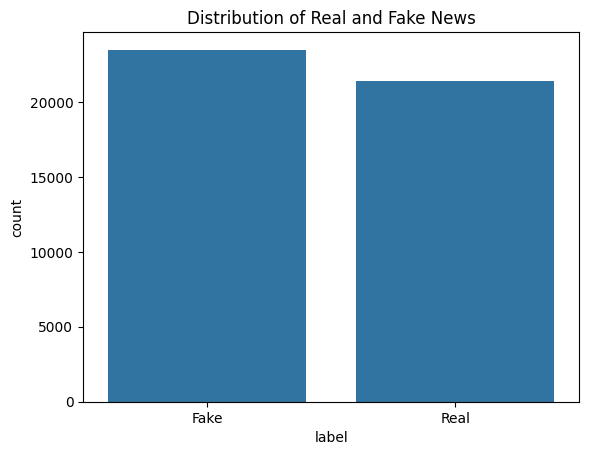

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x= 'label')
plt.title('Distribution of Real and Fake News')
plt.xticks(ticks = [0,1], labels = ['Fake', 'Real'])
plt.show()

In [5]:
df_eda = df.copy()

df_eda['text_len'] = df_eda['text'].apply(len)
df_eda['word_count'] = df_eda['text'].apply(lambda x: len(x.split()))
df_eda['title_word_count'] = df_eda['title'].apply(lambda x: len(x.split()))

df_eda[['text_len','word_count','title_word_count']].head()

,text_len,word_count,title_word_count
0,2114,361,11
1,2823,495,9
2,2402,379,14
3,629,88,9
4,793,138,19


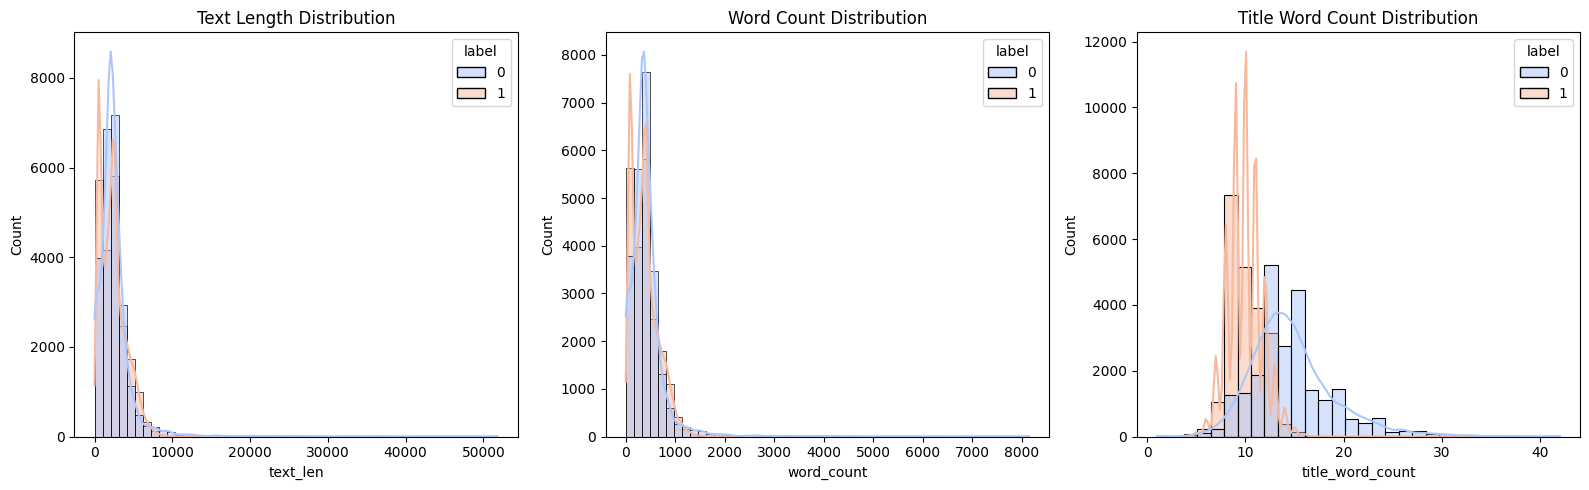

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize =(16,5))

plt.subplot(1,3,1)
sns.histplot(data = df_eda, x= 'text_len', hue = 'label', bins = 50, kde= True, palette = 'coolwarm')
plt.title('Text Length Distribution')

plt.subplot(1,3,2)
sns.histplot(data = df_eda, x = 'word_count', hue = 'label', bins = 50, kde = True, palette = 'coolwarm')
plt.title('Word Count Distribution')

plt.subplot(1,3,3)
sns.histplot(data = df_eda, x = 'title_word_count', hue = 'label', bins = 30, kde = True, palette = 'coolwarm')
plt.title('Title Word Count Distribution')

plt.tight_layout()
plt.show()

In [7]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'https?\S+|www\.\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [8]:
# pip install nltk

In [9]:
df_eda['clean_text'] = df_eda['text'].apply(clean_text)

In [10]:
df_eda.head()

,title,text,subject,date,label,text_len,word_count,title_word_count,clean_text
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0,2114,361,11,donald trump white house chaos trying cover ru...
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0,2823,495,9,donald trump presumptive gop nominee time reme...
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0,2402,379,14,mike penny huge homophobe support exgay conver...
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1,629,88,9,san francisco reuters california attorney gene...
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0,793,138,19,twisted reasoning come pelosi day especially p...


In [11]:
df_eda.shape

(44898, 9)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = 5000)

X_tfidf = tfidf_vectorizer.fit_transform(df_eda['clean_text'])

y = df_eda['label']

In [13]:
print(X_tfidf.shape)
print(X_tfidf[0].toarray())
print(tfidf_vectorizer.get_feature_names_out()[:10])

(44898, 5000)
[[0. 0. 0. ... 0. 0. 0.]]
['abandon' 'abandoned' 'abbas' 'abc' 'abdullah' 'abe' 'abedin' 'ability'
 'able' 'aboard']


In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

X = X_tfidf
y = df_eda['label']

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, random_state = 42, stratify=y

)

print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train distribution : {np.bincount(y_train)}')
print(f'y_test distribution : {np.bincount(y_test)}')

X_train shape : (35918, 5000)
X_test shape : (8980, 5000)
y_train distribution : [18785 17133]
y_test distribution : [4696 4284]


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print('Accuracy : ', accuracy_score(y_test, y_pred))
print('\nClassifaction Report : \n', classification_report(y_test, y_pred))

Accuracy :  0.9887527839643653

Classifaction Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



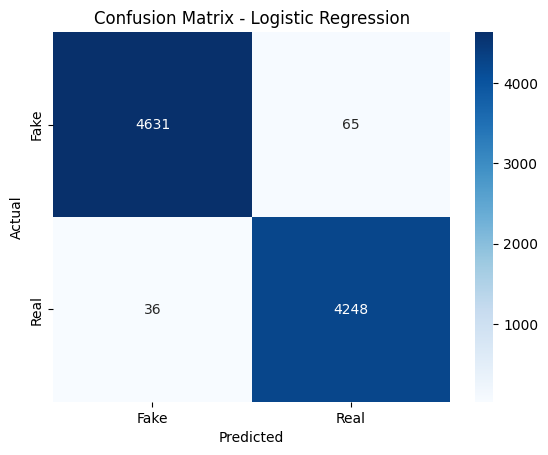

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=['Fake', 'Real'], yticklabels = ['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy (Random Forest): ', accuracy_rf)

print('\nClassification Report : \n')
print(classification_report(y_test, y_pred_rf))

Accuracy (Random Forest):  0.9979955456570155

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



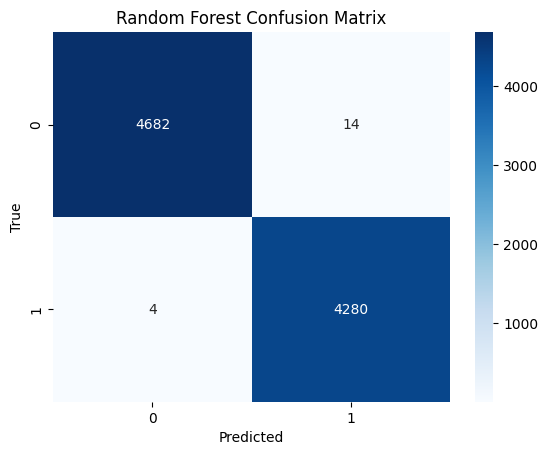

In [18]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

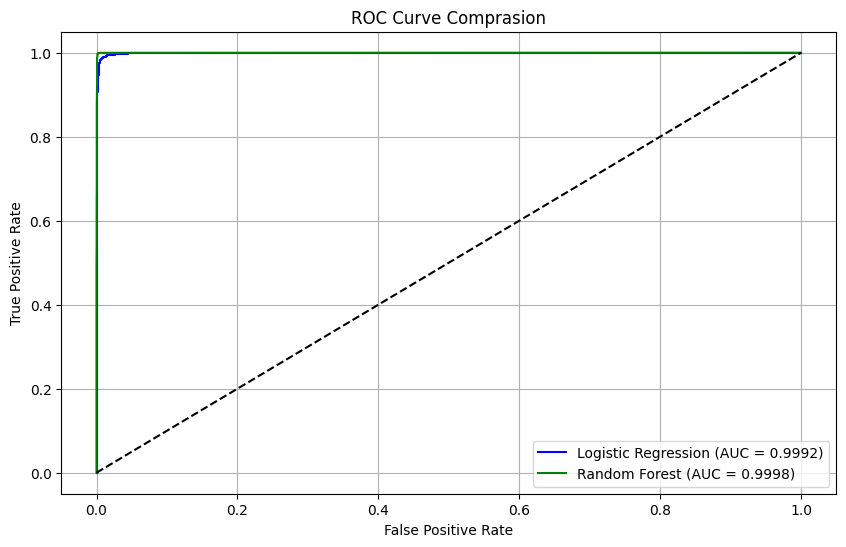

In [19]:
from sklearn.metrics import roc_curve, confusion_matrix,ConfusionMatrixDisplay, roc_auc_score, auc
import matplotlib.pyplot as plt

y_probs_lr = lr_model.predict_proba(X_test)[:,1]
y_probs_rf = rf_model.predict_proba(X_test)[:,1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize = (10,6))
plt.plot(fpr_lr, tpr_lr, label = f'Logistic Regression (AUC = {roc_auc_lr:.4f})', color = 'blue')
plt.plot(fpr_rf, tpr_rf, label = f'Random Forest (AUC = {roc_auc_rf:.4f})', color = 'green')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comprasion')
plt.legend()
plt.grid()
plt.show()

In [28]:
df_eda['clean_text']


,clean_text
0,donald trump white house chaos trying cover ru...
1,donald trump presumptive gop nominee time reme...
2,mike penny huge homophobe support exgay conver...
3,san francisco reuters california attorney gene...
4,twisted reasoning come pelosi day especially p...
...,...
44893,abuja reuters united state formally agreed sel...
44894,tune alternate current radio network acr anoth...
44895,convinced freedom religion group atheist get e...
44896,washington reuters republican tax plan unveile...


In [30]:
df_eda['label']

,label
0,0
1,0
2,0
3,1
4,0
...,...
44893,1
44894,0
44895,0
44896,1


In [31]:
df_eda.shape

(44898, 9)

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [38]:
texts = df_eda['clean_text'].astype(str).tolist()
labels = df_eda['label'].values

vocab_size = 20000
max_len = 300

tokenizer = Tokenizer(num_words = vocab_size, oov_token = '<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen = max_len, padding = 'post', truncating = 'post')
y = labels

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 42)

In [47]:
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = 128, input_length = max_len))
model.add(LSTM(64, return_sequences = False))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [57]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs = 6,
    batch_size = 64,
    validation_data=(X_test, y_test),
    class_weight = class_weights_dict,
    callbacks=[early_stop]

)

Epoch 1/6
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9991 - loss: 0.0062 - val_accuracy: 0.9942 - val_loss: 0.0244
Epoch 2/6
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9991 - loss: 0.0059 - val_accuracy: 0.9932 - val_loss: 0.0330
Epoch 3/6
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9994 - loss: 0.0048 - val_accuracy: 0.9949 - val_loss: 0.0274


281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
ROC AUC score : 0.9993


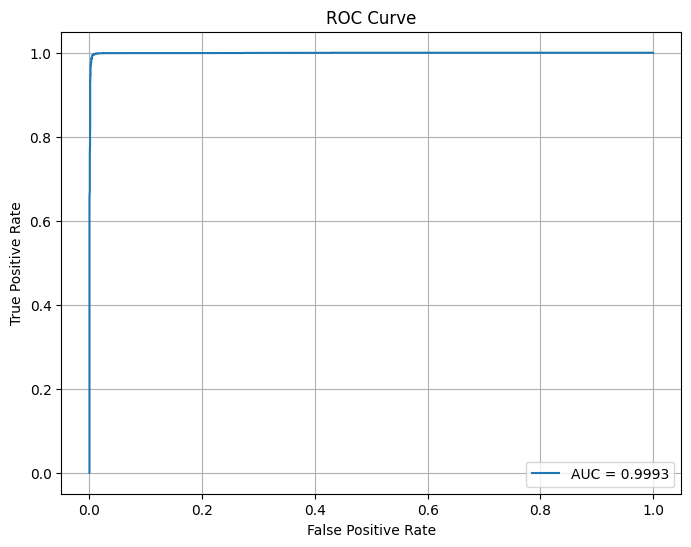

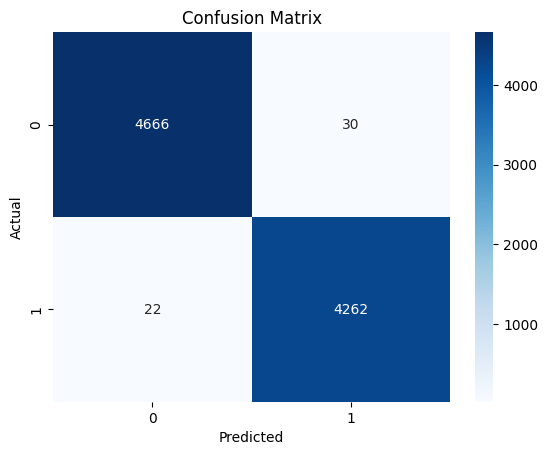

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [54]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_proba = model.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC score : {roc_auc:.4f}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label = f'AUC = {roc_auc:.4f}')
plt.plot([0.1], [0.1], linestyle='--', color ='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

y_pred_class = (y_pred_proba >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred_class))

In [55]:
model.save("lstm_fake_news_model.h5")

In [56]:
from google.colab import files
files.download("lstm_fake_news_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

In [59]:
from google.colab import files
files.download("tokenizer.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
code = """
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

# === Page Settings ===
st.set_page_config(page_title="📰 Fake News Detector", layout="wide")

# === Header ===
st.title("🧠 Fake News Detection with LSTM")
st.markdown(""
Bu uygulama, bir haber metninin **gerçek mi sahte mi** olduğunu analiz etmek için eğitilmiş bir LSTM modeli kullanır.
Lütfen aşağıya bir haber metni girin:
"")

# === Sidebar ===
with st.sidebar:
    st.title("ℹ️ Hakkında")
    st.markdown(""
    - Proje: NLP ile Sahte Haber Tespiti
    - Model: LSTM (Keras)
    - Eğitim Verisi: [Kaggle Fake News Dataset](https://www.kaggle.com)
    "")
    st.markdown("— Hazırlayan: [Senin İsmin]")

# === Load Model & Tokenizer ===
@st.cache_resource
def load_lstm_model():
    model = load_model("model_lstm.h5")
    with open("tokenizer.pkl", "rb") as f:
        tokenizer = pickle.load(f)
    return model, tokenizer

model, tokenizer = load_lstm_model()

# === Prediction Function ===
def predict_news(text, tokenizer, model, max_len=200):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    prediction = model.predict(padded)[0][0]
    label = "🟢 Gerçek" if prediction > 0.5 else "🔴 Sahte"
    proba = round(prediction, 3)
    return label, proba

# === User Input ===
news_input = st.text_area("📝 Haber Metni Girin", height=200)

if st.button("🚀 Analiz Et"):
    if news_input.strip() == "":
        st.warning("Lütfen bir haber metni girin.")
    else:
        label, proba = predict_news(news_input, tokenizer, model)
        st.subheader("🔍 Tahmin Sonucu:")
        st.success(f"{label} (Olasılık: {proba})")

        st.markdown("---")
        st.write("📊 **Haber Özeti:**")
        st.write(f"- Karakter Sayısı: {len(news_input)}")
        st.write(f"- Kelime Sayısı: {len(news_input.split())}")
"""
with open("app.py", "w") as f:
    f.write(code)

In [62]:
!pip install streamlit
!npm install -g localtunnel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 114.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.5 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
added 22 packages in 3s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏

In [63]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋

⠙⠹⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.143.239.250:8501

your url is: https://large-papayas-glow.loca.lt
  Stopping...
^C
